# Lesson 8 Practice: Seaborn

Use this notebook to follow along with the lesson in the corresponding lesson notebook: [L08-Seaborn-Lesson.ipynb](./L08-Seaborn-Lesson.ipynb).  


## Instructions
Follow along with the teaching material in the lesson. Throughout the tutorial sections labeled as "Tasks" are interspersed and indicated with the icon: ![Task](http://icons.iconarchive.com/icons/sbstnblnd/plateau/16/Apps-gnome-info-icon.png). You should follow the instructions provided in these sections by performing them in the practice notebook.  When the tutorial is completed you can turn in the final practice notebook. For each task, use the cell below it to write and test your code.  You may add additional cells for any task as needed or desired.  

## Task 1a Setup

Import the following packages:
+ seaborn as sns
+ pandas as pd
+ numpy as np
+ matplotlib.pyplot as plt

Activate the `%matplotlib inline` magic.

In [2]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Task 2a Load Data

+ View available datasets by calling `sns.get_dataset_names`.
+ Choose one of those datasets and explore it.

In [3]:
sns.get_dataset_names()
exercise = sns.load_dataset("exercise")

C:\Users\matthew.brousil\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\utils.py:376: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 376 of the file C:\Users\matthew.brousil\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\utils.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  gh_list = BeautifulSoup(http)


What is the shape?

In [4]:
exercise.shape

(90, 6)

What are the columns?

In [5]:
exercise.columns

Index(['Unnamed: 0', 'id', 'diet', 'pulse', 'time', 'kind'], dtype='object')

 What are the data types?

In [6]:
exercise.dtypes

Unnamed: 0       int64
id               int64
diet          category
pulse            int64
time          category
kind          category
dtype: object

Are there missing values?

In [7]:
exercise.isna().sum()

Unnamed: 0    0
id            0
diet          0
pulse         0
time          0
kind          0
dtype: int64

Are there duplicated rows?

In [8]:
exercise.duplicated().sum()

0

For categorical columns find the unique set of categories.

In [9]:
print(exercise["diet"].unique())
print(exercise["time"].unique())
print(exercise["kind"].unique())

[low fat, no fat]
Categories (2, object): [low fat, no fat]
[1 min, 15 min, 30 min]
Categories (3, object): [1 min, 15 min, 30 min]
[rest, walking, running]
Categories (3, object): [rest, walking, running]


Is the data tidy?

In [10]:
exercise.head()

# Yes, the data are tidy. Variables are columns, each observation is a row,
# and there's only one level of observational units

,Unnamed: 0,id,diet,pulse,time,kind
0,0,1,low fat,85,1 min,rest
1,1,1,low fat,85,15 min,rest
2,2,1,low fat,88,30 min,rest
3,3,2,low fat,90,1 min,rest
4,4,2,low fat,92,15 min,rest


## Task 2b Preview Seaborn

Take some time to peruse the Seaborn [example gallery](https://seaborn.pydata.org/examples/index.html).  Indicate which plot types are most interesting to you. Which do you expect will be most useful with current research projects you may be working on?

## Task 3a Using `relplot`

Experiment with the `size`, `hue` and `style` semantics by applying them to another example dataset of your choice.

*You should produce three or more plots for this task.*

In [11]:
exercise.head()

,Unnamed: 0,id,diet,pulse,time,kind
0,0,1,low fat,85,1 min,rest
1,1,1,low fat,85,15 min,rest
2,2,1,low fat,88,30 min,rest
3,3,2,low fat,90,1 min,rest
4,4,2,low fat,92,15 min,rest


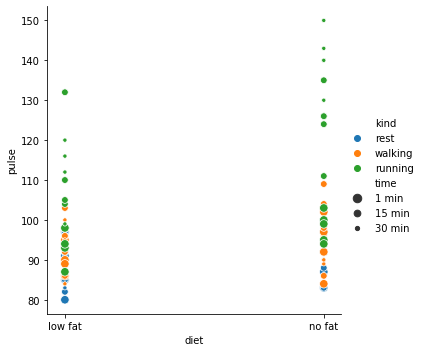

In [16]:
sns.relplot(data = exercise, x = "diet", y = "pulse", hue = "kind", size = "time")

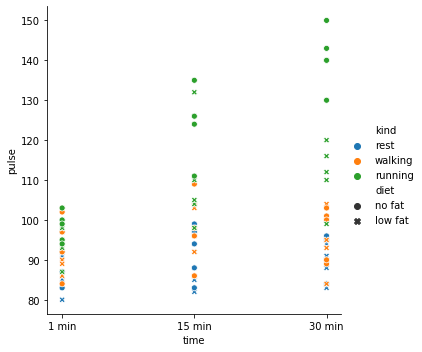

In [20]:
sns.relplot(data = exercise, x = "time", y = "pulse", style = "diet", hue = "kind")

## Task 4a: Explore built-in styles

Using a dataset of your choice, practice creating a plot for each of these different styles:

+ darkgrid
+ whitegrid
+ dark
+ white
+ ticks

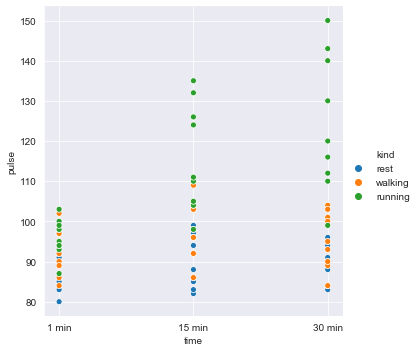

In [21]:
sns.set_style("darkgrid")
sns.relplot(data = exercise, x = "time", y = "pulse", hue = "kind")

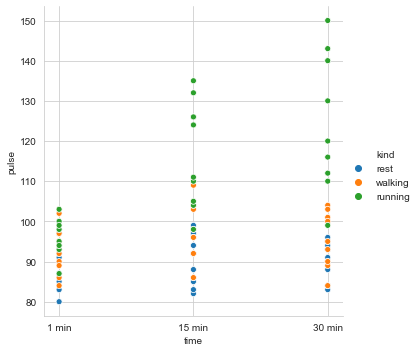

In [22]:
sns.set_style("whitegrid")
sns.relplot(data = exercise, x = "time", y = "pulse", hue = "kind")

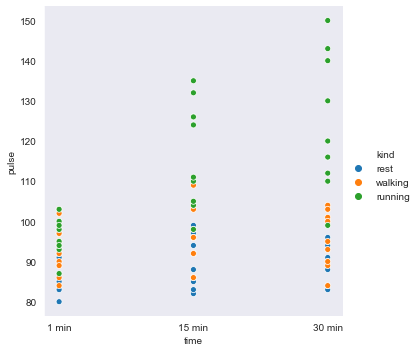

In [23]:
sns.set_style("dark")
sns.relplot(data = exercise, x = "time", y = "pulse", hue = "kind")

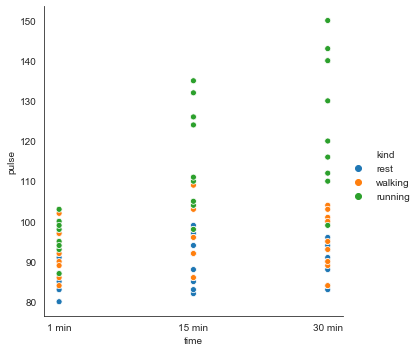

In [24]:
sns.set_style("white")
sns.relplot(data = exercise, x = "time", y = "pulse", hue = "kind")

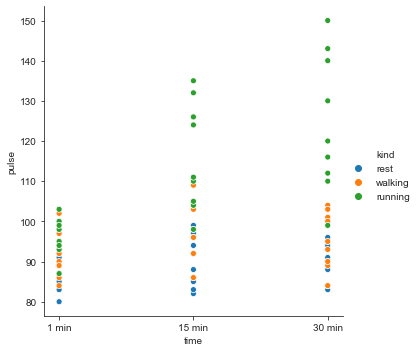

In [27]:
sns.set_style("ticks")
sns.relplot(data = exercise, x = "time", y = "pulse", hue = "kind")

## Task 4b

Experiment with the style options and palettes introduced above. Create and demonstrate a style of your own using a dataset of your choice.

   total  speeding  alcohol  not_distracted  no_previous  ins_premium  \
0   18.8     7.332    5.640          18.048       15.040       784.55   
1   18.1     7.421    4.525          16.290       17.014      1053.48   
2   18.6     6.510    5.208          15.624       17.856       899.47   
3   22.4     4.032    5.824          21.056       21.280       827.34   
4   12.0     4.200    3.360          10.920       10.680       878.41   

   ins_losses abbrev  
0      145.08     AL  
1      133.93     AK  
2      110.35     AZ  
3      142.39     AR  
4      165.63     CA  


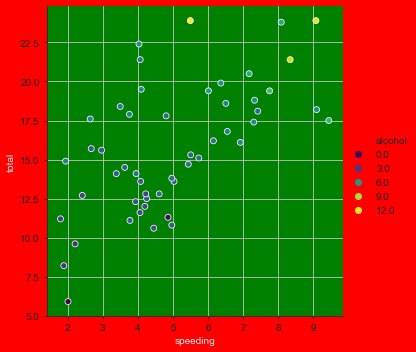

In [46]:
crash = sns.load_dataset("car_crashes")

print(crash.head())

brousil_style = {
    'axes.labelcolor': '.90',
    'figure.facecolor': 'red',
    'axes.facecolor': 'green',
    "axes.grid" : True
}

with sns.plotting_context(brousil_style):
    sns.relplot(x = "speeding", y = "total", data = crash, hue = "alcohol", palette = "viridis")

## Task 5a

Examine the [Seaborn gallery](https://seaborn.pydata.org/examples/index.html) and find **two to four plots** types that interest you. Re-create a version of those plots using a different data set (make any other style changes you wish).


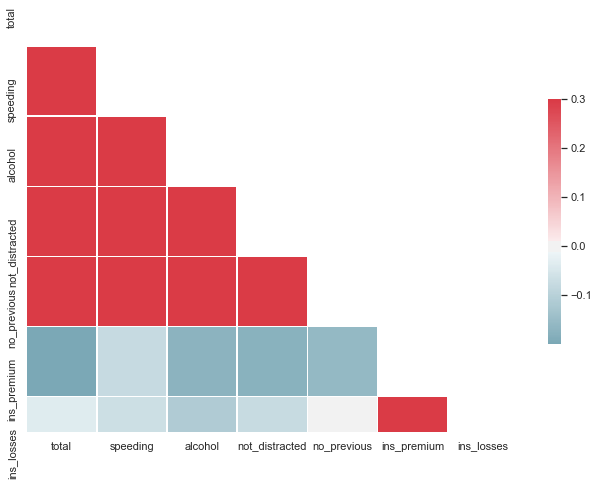

In [47]:
from string import ascii_letters

sns.set(style="white")

# Compute the correlation matrix
corr = crash.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')


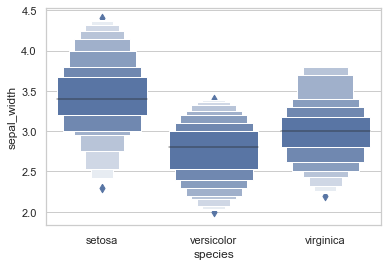

In [57]:
sns.set(style="whitegrid")

iris = sns.load_dataset("iris")

print(iris.columns)

iris.head()

sns.boxenplot(x="species", y="sepal_width",
              color="b", # order=clarity_ranking,
              scale="linear", data=iris)